In [155]:
## imported simple json over json as it is faster
import simplejson as json
import pandas as pd
import timeit
import sys
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import matplotlib.dates as mdates
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from datetime import timezone,tzinfo
from dateutil.parser import parse
from nltk.stem import WordNetLemmatizer

import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud


import pytz


In [133]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [20,10]

### Loading messages into dataframe

In [3]:
%%time
input_file="gabai.0013.json"
ls=[]
with open(input_file) as f:
    for i,line in enumerate(f):
        try:
            c_line=json.loads(line)
            ls.append(c_line)
            if((i+1)%50000==0):
                print(i)
        except:
            print("Error at line number",i)       


49999
99999
149999
199999
249999
299999
349999
399999
449999
499999
549999
599999
649999
699999
749999
799999
849999
Error at line number 872991
Error at line number 872992
Error at line number 872993
Error at line number 872994
Error at line number 872995
Error at line number 872996
Error at line number 872997
Error at line number 872998
Error at line number 872999
Error at line number 873000
Error at line number 873001
Error at line number 873002
Error at line number 873003
Error at line number 873004
Error at line number 873005
Error at line number 873006
Error at line number 873007
Error at line number 873008
Error at line number 873009
Error at line number 873010
Error at line number 873011
Error at line number 873012
Error at line number 873013
Error at line number 873014
Error at line number 873015
Error at line number 873016
Error at line number 873017
Error at line number 873018
Error at line number 873019
Error at line number 873020
Error at line number 873021
Error at line n

In [4]:
## loading the list into a dataframe now.
df=pd.DataFrame(ls)


### Adding trump messages into a list

In [5]:
%%time

trump_tags=['trump','donald','president']
message_list= df['body'].tolist()
trump_messages=[]

for message in message_list:
    message = message.lower()
    tokens = word_tokenize(message)
    if True in (tag in tokens for tag in trump_tags):
        trump_messages.append(message)
    


CPU times: user 4min 49s, sys: 3.73 s, total: 4min 52s
Wall time: 4min 57s


In [6]:
print(len(message_list))
print(len(trump_messages))

999992
48531


### Steps Undertaken for processing the messages:
* Stop Word Removal
* Word Lemmatization
* POS Tagging
* Top 10 nouns, adverbs and overall words
* Bar graphs for them
* Word Cloud for top 50 related words
* Top Hash tags related with trump

In [176]:
lemmatizer = WordNetLemmatizer()
stop_words = set(line.strip() for line in open('stop_words.txt'))
stop_words.add("https")
stop_words.add("http")
stop_words.add("trump")
def make_pos_df(message_list):
    '''take list of messages, non tokenized, and return a dataframe of all words lemmatized with their pos tags'''    
    word_pos_mlist = []
    i=1
    for message in message_list:
        message = message.lower()
        tokens = word_tokenize(message)   
        filtered_words = [w for w in tokens if not w in stop_words]
        alnum_words = [w for w in filtered_words if w.isalnum()]
        lemmatized_words= [lemmatizer.lemmatize(w) for w in alnum_words ] 
        pos_tags = nltk.tag.pos_tag(lemmatized_words)
        ld =[{'word': tag[0], 'pos_tag': tag[1]} for tag in pos_tags]
        word_pos_mlist.extend(ld)
        i+=1
        if(i%5000==0):
            print("i is--",i)

    df = pd.DataFrame(word_pos_mlist)
    return df


In [140]:
%%time 
trump_word_df=make_pos_df(trump_messages)

i is-- 5000
i is-- 10000
i is-- 15000
i is-- 20000
i is-- 25000
i is-- 30000
i is-- 35000
i is-- 40000
i is-- 45000
CPU times: user 1min 6s, sys: 1.43 s, total: 1min 8s
Wall time: 1min 9s


In [171]:
def top_n_tagged_word(word_df,tags=[],n=10):
    '''Prints and returns the top n words of the given tags'''
    if tags==[]:
        return word_df.groupby(['word']).word.count().nlargest(n)
    tagged_words = word_df.loc[word_df['pos_tag'].isin(tags)]
    tag_n_words = tagged_words.groupby(['word']).word.count().nlargest(n)
    return tag_n_words
    
    

In [267]:
def print_top_words(w_df):
    print("Word\t\tOccurences")
    for word,frequency in w_df.items():
        print("{:<10}\t{}".format(word,frequency))
        
def plot_top_words(w_df,label="Overall Words Frequrncy",graph_color="Blue"):
    w_df=w_df.to_dict()
    words = w_df.keys()
    y_pos = np.arange(len(words))
    frequencies = list(w_df.values())
    print(frequencies)
    plt.barh(y_pos, frequencies, align='center', alpha=0.5,color=graph_color)
    plt.yticks(y_pos, words ,size='20')
    plt.xlabel('Words')
    plt.title(label,size='20')
    plt.show()

In [268]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>


Top 10 overall words
Word		Occurences
maga      	11416
president 	11250
news      	8581
gabfam    	7436
deutsch   	6032
russia    	5391
speakfreely	5093
gab       	3993
msm       	3930
politics  	3788
[11416, 11250, 8581, 7436, 6032, 5391, 5093, 3993, 3930, 3788]


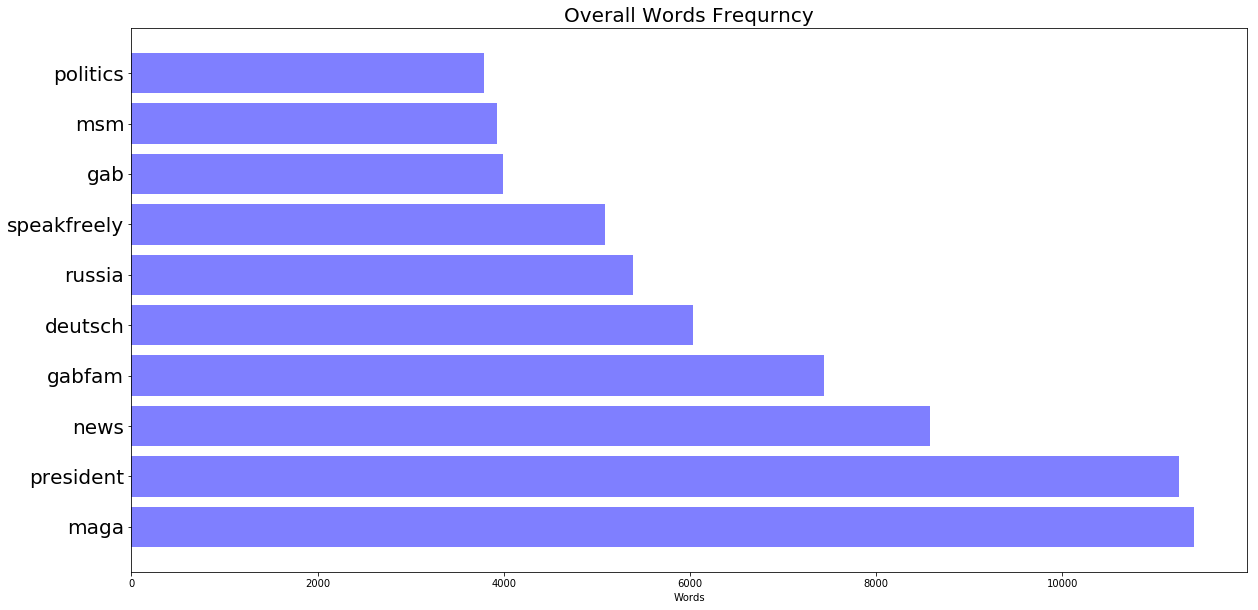



Top 10 adjectives (comparatives and superlatives)
Word		Occurences
worse     	172
west      	132
worst     	125
biggest   	117
honest    	70
bigger    	66
loser     	52
dossier   	43
warmbier  	38
protest   	35
[172, 132, 125, 117, 70, 66, 52, 43, 38, 35]


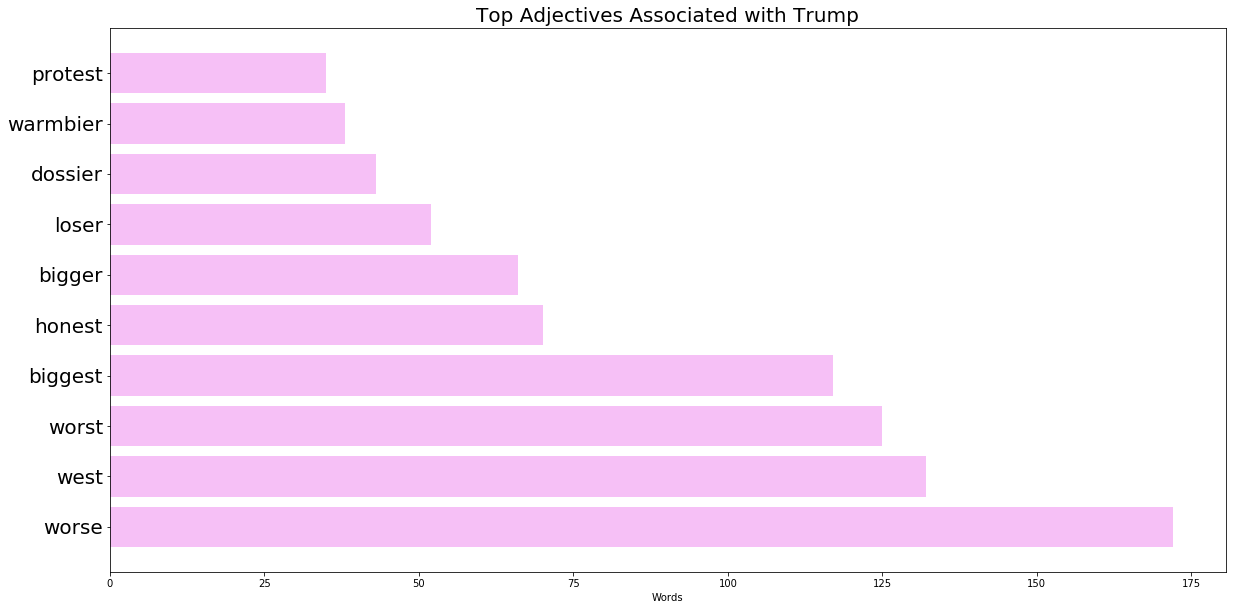



Top 10 nouns
Word		Occurences
president 	11250
maga      	9749
news      	8581
gabfam    	6849
deutsch   	6030
russia    	5105
politics  	3787
msm       	3709
jesus     	3168
tcot      	3162
[11250, 9749, 8581, 6849, 6030, 5105, 3787, 3709, 3168, 3162]


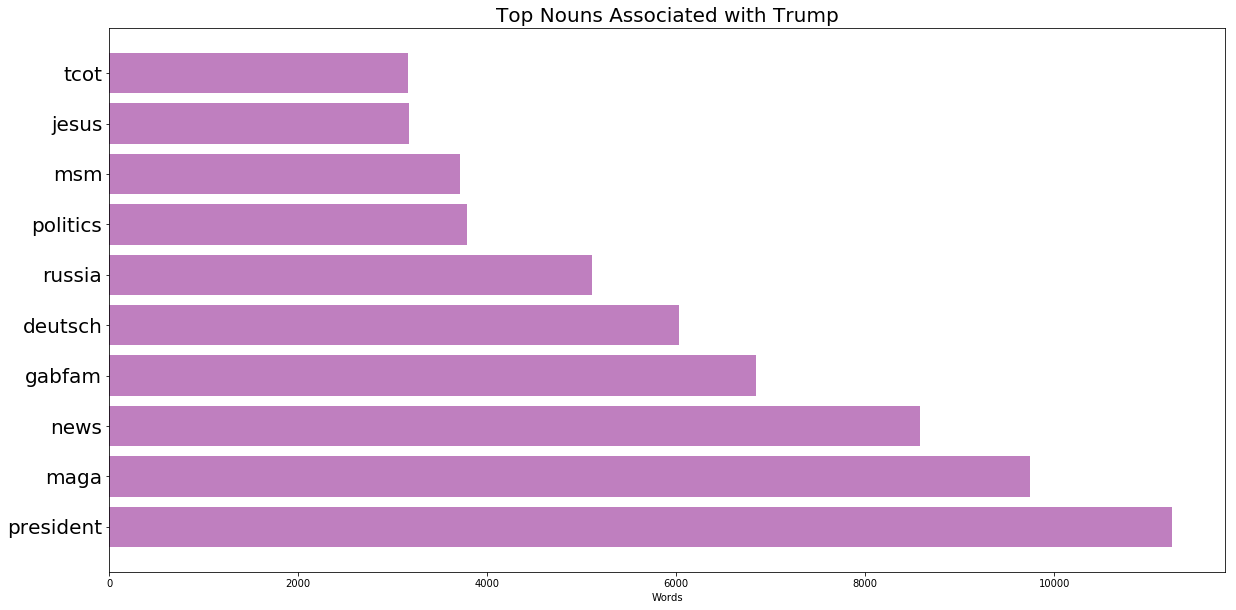

In [269]:
print("\nTop 10 overall words")
print_top_words(top_n_tagged_word(trump_word_df))
plot_top_words(top_n_tagged_word(trump_word_df))
print("\n\nTop 10 adjectives (comparatives and superlatives)")
top_n_adjectives = top_n_tagged_word(trump_word_df,['JJR','JJS'])
print_top_words(top_n_adjectives)
plot_top_words(top_n_adjectives,"Top Adjectives Associated with Trump","Violet")                             
print("\n\nTop 10 nouns")
top_n_nouns =  top_n_tagged_word(trump_word_df,['NN','NNS','NNP','NNPS'])
print_top_words(top_n_nouns)                                    
plot_top_words(top_n_nouns,"Top Nouns Associated with Trump","Purple")                             


In [178]:
### The word maga was tagged diffrently according to context so exploring it
print(word_df.loc[word_df['word']=='maga'].groupby(['pos_tag']).pos_tag.count().nlargest(10))

pos_tag
NN     9478
JJ      588
VBP     346
NNS     268
FW      196
VBD     179
RBS     151
CD      149
VBZ      20
VB       14
Name: pos_tag, dtype: int64


### Word Count of top top 50 words

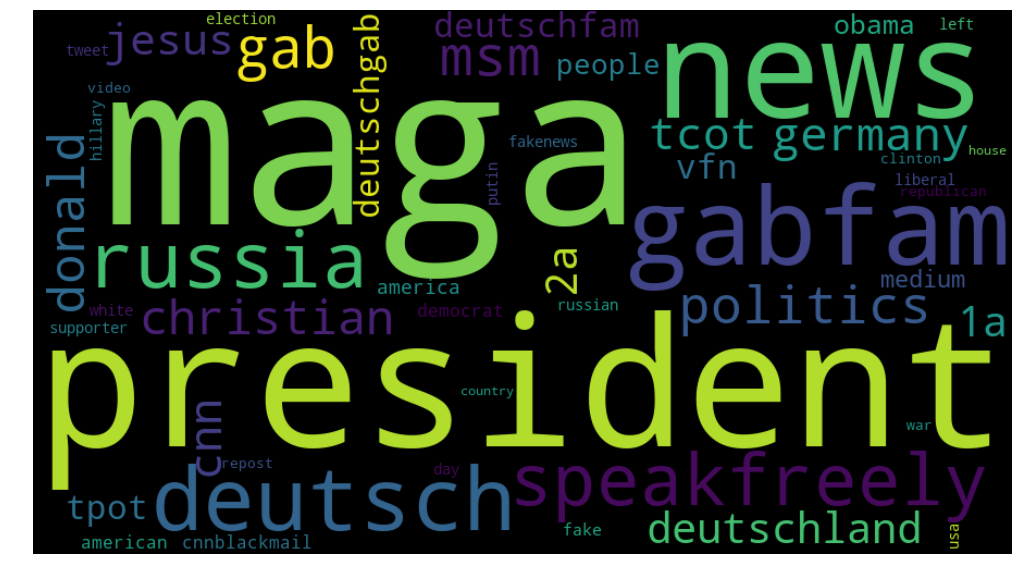

In [179]:
top_50_words = top_n_tagged_word(trump_word_df,n=50)

wordcloud = WordCloud(width=900,height=500, max_words=50,relative_scaling=1,normalize_plurals=False).\
    generate_from_frequencies(top_50_words.to_dict())
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Gives the top 10 hashtags from messages

In [270]:
def plot_top_hash_tags(w_dict):
    words = [a for a,b in w_dict]
    y_pos = np.arange(len(words))
    frequencies = [b for a,b in w_dict ]
    print(frequencies)
    plt.barh(y_pos, frequencies, align='center', alpha=0.5,color='g')
    plt.yticks(y_pos, words ,size='20')
    plt.xlabel('Words')
    plt.title("Top Hash Tags ",size='20')
    plt.show()

trump     	14130
maga      	11283
gabfam    	7412
deutsch   	6022
news      	5724
speakfreely	5091
russia    	3698
gab       	3681
politics  	3573
tcot      	3270
[14130, 11283, 7412, 6022, 5724, 5091, 3698, 3681, 3573, 3270]


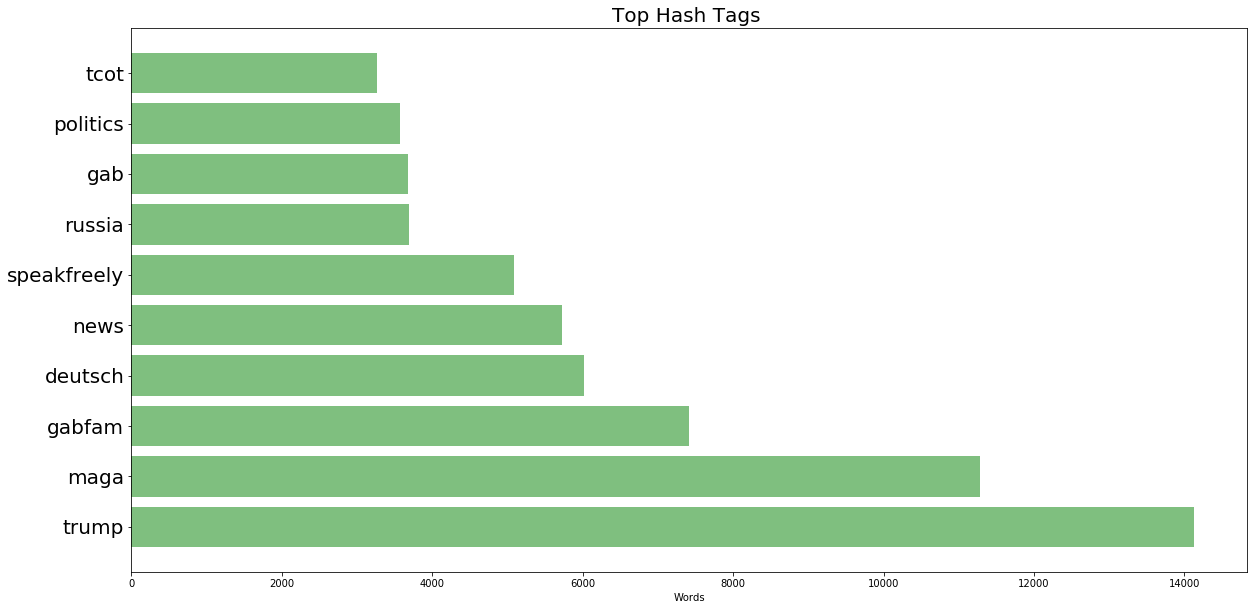

In [271]:
hash_tags=[]
## test_message=["#jawa #blessed","#india is amazing #blessed"]
pat = re.compile(r"#(\w+)")
for message in trump_messages:
    hash_tags.extend(pat.findall(message))
    
hashtag_counter=Counter(hash_tags)
top_10_hash_tags = hashtag_counter.most_common(10)
for hashtag,count in top_10_hash_tags:
    print("{:<10}\t{}".format(hashtag,count))

plot_top_hash_tags(top_10_hash_tags)